# OpenAI Gym Introduction

Just a simple example of OpenAI gym to get  familiar with it

In [24]:
import gym
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# create the environment
env = gym.make("CartPole-v0")

/home/luis/anaconda3/envs/python311_torch113_tf212/lib/python3.10/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [3]:
# start an episode, it returns an array that represents the initial state
env.reset()

(array([-0.00243537,  0.01118677, -0.00404198,  0.03051671], dtype=float32),
 {})

The states/observations are 4 numbers:
* Cart Position
* Cart velocityh
* Pole Angle
* Pole velocity at tip

We can also get information about the state space with code, for example a sample of the state space or validate if a state is part of it

In [7]:
box = env.observation_space
dir(box)

['__annotations__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_is_protocol',
 '_np_random',
 '_shape',
 'bounded_above',
 'bounded_below',
 'contains',
 'dtype',
 'from_jsonable',
 'high',
 'high_repr',
 'is_bounded',
 'is_np_flattenable',
 'low',
 'low_repr',
 'np_random',
 'sample',
 'seed',
 'shape',
 'to_jsonable']

For  this problem there are 2 actions:
* push car to the left
* push car to the right

We can also get information about the sample space

In [8]:
action_space = env.action_space

dir(action_space)

['__annotations__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_is_protocol',
 '_np_random',
 '_shape',
 'contains',
 'dtype',
 'from_jsonable',
 'is_np_flattenable',
 'n',
 'np_random',
 'sample',
 'seed',
 'shape',
 'start',
 'to_jsonable']

Every step of the agent in the environment returns 5 elements:
* the next state/observation
* the reward
* done flag(is the episode over?)
* truncation flag(was the episode prematurely terminated? some conditions like time or physical agent constraints can trigger this)
* Info(additional details)

In [16]:
state, reward, done, truncated, info = env.step(env.action_space.sample())

print(state, reward, done, truncated, info)

[-1.9518324 -0.4175616 10.768401   8.263847 ] 0.0 True False {}


This example has no "learning" so the following example runs episodes randomly.
It takes random actions without considering the state. 
Multiple episodes are run and then a distribution of number steps to finish is calculated

In [36]:
EPISODES = 10000
steps_counts = []

for i in range(EPISODES):
    done = False
    steps_count = 0
    env.reset()
    while not done:
        # next state, step reward, is episode finished, is episode truncated, info
        state, reward, done, truncated, info = env.step(env.action_space.sample())
        steps_count+=1

    steps_counts.append(steps_count)

        steps_count
count  10000.000000
mean      22.108100
std       11.882632
min        8.000000
25%       14.000000
50%       19.000000
75%       27.000000
max      120.000000


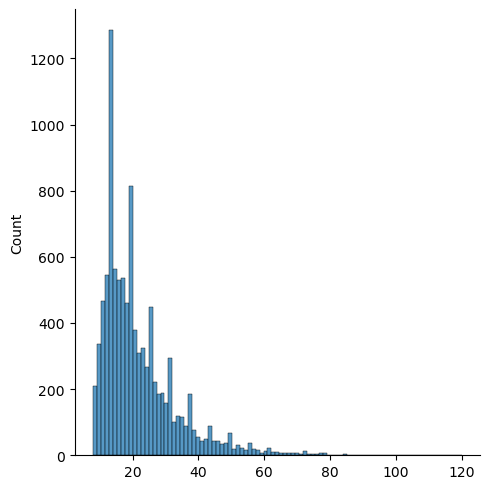

In [37]:
print(pd.DataFrame(data=steps_counts,columns=["steps_count"]).describe())
sns.displot(steps_counts)
plt.show()